In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
N_samples = 1000000

T = 300 # K
m = 4.66e-26 # kg
k_B = 1.38e-23 # J/K
g = 9.81 # m/s^2

beta = 1/(k_B*T)

In [49]:
def inv_cumulative(x, beta, m, g):
    """Returns the value of the inverse cumuative distribution function for f(h)"""
    return -(1/(beta * m * g)) * np.log(1 - x)

In [50]:
# Sample values from uniform distribution between 0 and 1
x = np.random.rand(N_samples)

# Draw from f(h) using the inverse cumulative distribution function
h = inv_cumulative(x, beta, m, g)

Text(0, 0.5, 'p(h) [m$^-1$]')

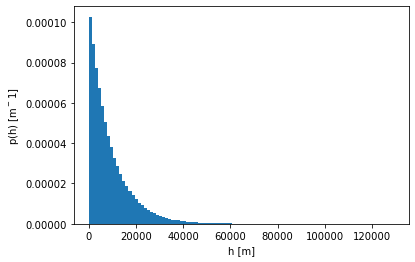

In [51]:
# Let's have a look at the distribution of h
plt.hist(h, density=True, bins = 100)
plt.xlabel("h [m]")
plt.ylabel("p(h) [m$^-1$]")

In [52]:
avg_h = 1/N_samples * np.sum(h)
avg_h_analytical = 1/(beta*m*g)

avg_U = avg_h * m * g
avg_U_analytical = 1/beta

In [53]:
print("Average height: {}".format(avg_h))
print("Analytical average height: {}\n".format(avg_h_analytical))

print("Average potential energy: {}".format(avg_U))
print("Analytical average potential energy: {}".format(avg_U_analytical))

Average height: 9069.380922886385
Analytical average height: 9056.187738709295

Average potential energy: 4.1460312113738195e-21
Analytical average potential energy: 4.14e-21



The estimate of the average height from simulations will asymptotically approach the true value with more trials.

We can repeat our simulation multiple times to get a better estimate of the average height:

In [54]:
N = 100
avg_h_list, avg_U_list = [], []

for i in range(N):
    
    x = np.random.rand(N_samples)
    h = inv_cumulative(x, beta, m, g)
    
    avg_h_list.append(1/N_samples * np.sum(h))
    avg_U_list.append(avg_h_list[-1] * m * g)
    
print("Average Height from {} simulations: {}".format(N, np.average(avg_h_list)))
print("Analytical average height: {}\n".format(avg_h_analytical))

print("Average potential energy from {} simulations: {}".format(N, np.average(avg_U_list)))
print("Analytical average potential energy: {}".format(avg_U_analytical))

Average Height from 100 simulations: 9057.178031174872
Analytical average height: 9056.187738709295

Average potential energy from 100 simulations: 4.140452708239468e-21
Analytical average potential energy: 4.14e-21
